In [20]:
import numpy as np
from sklearn.cluster import KMeans

In [21]:
def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in xrange(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [22]:
from create_matrix import *

region = "Austin"
year = 2014
df = create_matrix_region_appliance_year(region, year, "dw")

In [68]:
df = df[['aggregate_1', 'aggregate_2','aggregate_3','aggregate_4','aggregate_5','aggregate_6','aggregate_7','aggregate_8','aggregate_9','aggregate_10','aggregate_11','aggregate_12']]
matrix = df.values

In [70]:
labels, centroids, X_hat = kmeans_missing(matrix, 4, 100)

In [71]:
print labels

[1 0 1 0 1 0 2 0 1 1 0 1 0 1 1 1 1 0 2 1 2 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 2 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 1 2 0 1 1 1 0 0 1 0 0 0 2 2 0 0 0 2 0 0 1 0 0 1 1 0 1 0 0 2
 1 0 1 0 0 0 0 0 1 1 0 2 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 2 0 1 1 0 0 1 1 1 1 1 0 2 0
 1 1 0 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 0 0 2 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 2
 2 1 0 0 1 1 0 1 1 0 2 0 0 0 1 0 1 1 2 0 0 0 0 1 0 0 1 1 1 0 1 0 0 2 0 0 0
 0 1 1 0 1 1 1 1 0 1 1 1 0 2 0 0 2 0 1 1 2 1 0 1 1 0 1 0 1 1 0 1 2 0 0 0 1
 1 1 1 1 0 0 2 1 1 0 0 0 0 0 2 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 0 2 2 0 0 0 1 1 0 0 1 1 0 1 1 2 0 1 2 0 1 0 0 1 0 0 0 2 0 1 0
 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 2 0 1 0 1 1 1 0 0 1 2 2 0 0 1 1 0 0 0 0 1
 1 2 0 1 0 1 0 0 0 0 0 2 0 0 1 1 2 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 2 1 0 0 1 

In [72]:
print X_hat

[[  378.08895874   321.61669922   255.91644287 ...,   241.12364197
    265.38214111   290.06552124]
 [  765.00280762   663.85107422   769.03582764 ...,  1073.36669922
    667.83117676   800.9432373 ]
 [  257.93243408   263.47686768   219.26092529 ...,   438.09437235
    350.36401466   385.38116572]
 ..., 
 [  415.29741579   466.34451294   406.55975342 ...,   251.4528656
    457.96615601   534.44805908]
 [  415.29741579   364.18694937   350.86098717 ...,   344.1413269
    346.38354492   381.5491333 ]
 [  330.80233765   285.29852295   278.49157715 ...,   546.79144287
    323.72976685   383.29455566]]


In [73]:
%pylab inline

from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# iris = load_iris()
X_tsne = TSNE(learning_rate=100,random_state=0).fit_transform(X_hat)
X_pca = PCA().fit_transform(X_hat)

Populating the interactive namespace from numpy and matplotlib


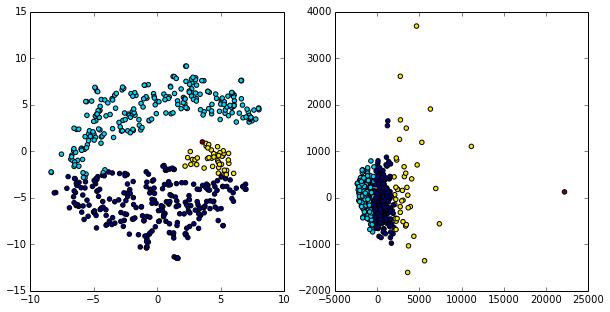

In [74]:
figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=labels)